### Importing and building the plotting functions

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go

In [11]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [29]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    return px.line(
        DF, 
        x = DF.index, 
        y = Countries, 
        labels = {'x': xlabel, 'y': name}, 
        title = name, 
        log_y = True if scale=='log' else False
    )

In [27]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [14]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [15]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [16]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [17]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [18]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [19]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [20]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-17,444529,4679137,672635,589573,270538,135314,130233,193111,116618,92928,85783,125826,116436,4849,198891
2021-09-18,444838,4685838,673472,590508,270538,135478,130284,193891,116662,92964,85783,125860,116791,4849,198976
2021-09-19,445133,4691849,673774,590752,271503,135539,130310,194671,116696,92977,85783,125895,117182,4849,199066
2021-09-20,445385,4700003,676076,590955,271765,135589,130354,195438,116765,93058,85901,125924,117526,4849,199036
2021-09-21,445768,4709101,678407,591440,272580,135793,130421,196235,116901,93129,85983,125962,117905,4849,199060


In [31]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-17,35662,593099,207886,11202,3754,32566,4544,19589,7756,9904,3222,1544,17605,49,0
2021-09-18,30773,532986,56849,150106,0,29476,4576,19999,7972,7103,0,1655,12847,71,2039
2021-09-19,30256,358548,37533,9458,16694,29298,3836,19825,5944,5667,0,1813,15975,52,589
2021-09-20,26115,540395,201648,7884,3367,35943,2405,19376,1547,5328,5988,1185,17397,77,644
2021-09-21,26964,453723,120788,-573,0,31188,3374,18796,8776,7277,0,1373,17564,42,779


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-17,35551,587708,152379,20542,12192,32657,5249,18832,12741,9093,6449,2537,26011,50,917
2021-09-18,35232,584060,146010,29180,11379,32445,5204,18910,12423,8961,6019,2478,25133,51,992
2021-09-19,34900,569026,138778,27865,11733,32235,5113,18971,11991,8741,5618,2434,24522,51,965
2021-09-20,34315,567117,142969,26533,11176,32483,4932,18998,11295,8513,5642,2350,24047,53,944
2021-09-21,33824,559558,141491,24726,10430,32396,4828,18984,11127,8431,5266,2285,23615,52,933


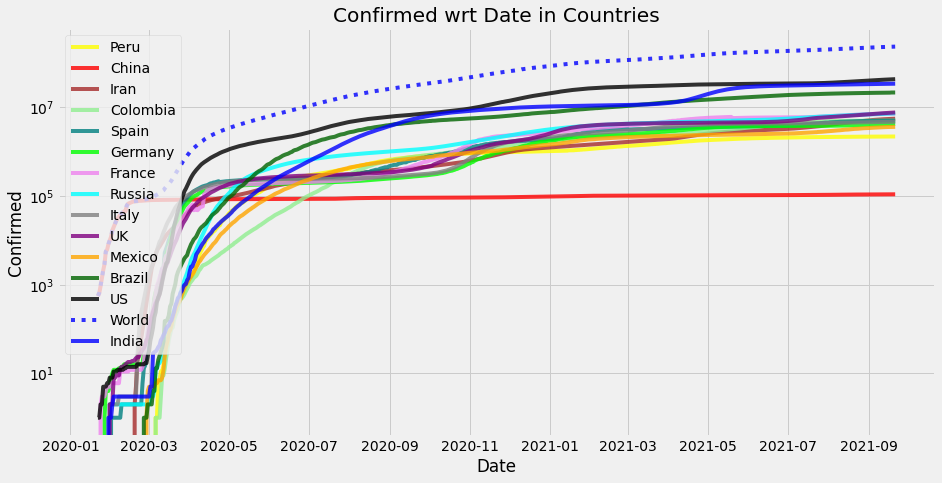

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-17,281,8608,2362,327,190,180,66,771,107,22,44,44,364,0,0
2021-09-18,309,6701,837,935,0,164,51,780,44,36,0,34,355,0,85
2021-09-19,295,6011,302,244,965,61,26,780,34,13,0,35,391,0,90
2021-09-20,252,8154,2302,203,262,50,44,767,69,81,118,29,344,0,-30
2021-09-21,383,8201,2331,485,0,204,67,797,136,71,0,38,379,0,24


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-17,332.43,9258.48,1964.56,546.95,597.26,143.64,59.28,768.80,95.14,43.45,82.76,50.59,482.40,0.07,33.45
2021-09-18,329.50,8938.80,1823.61,595.46,522.60,146.19,58.24,770.20,88.75,42.52,72.41,48.52,466.47,0.06,39.89
2021-09-19,325.19,8572.82,1633.41,551.52,577.90,135.54,54.21,771.43,81.91,38.83,63.36,46.83,457.04,0.06,46.16
2021-09-20,316.04,8520.47,1716.98,507.96,538.42,124.85,52.94,770.87,80.29,44.10,70.19,44.60,442.91,0.05,36.64
2021-09-21,324.41,8480.54,1793.74,505.09,471.11,134.74,54.69,774.14,87.26,47.46,61.42,43.77,434.92,0.04,35.06


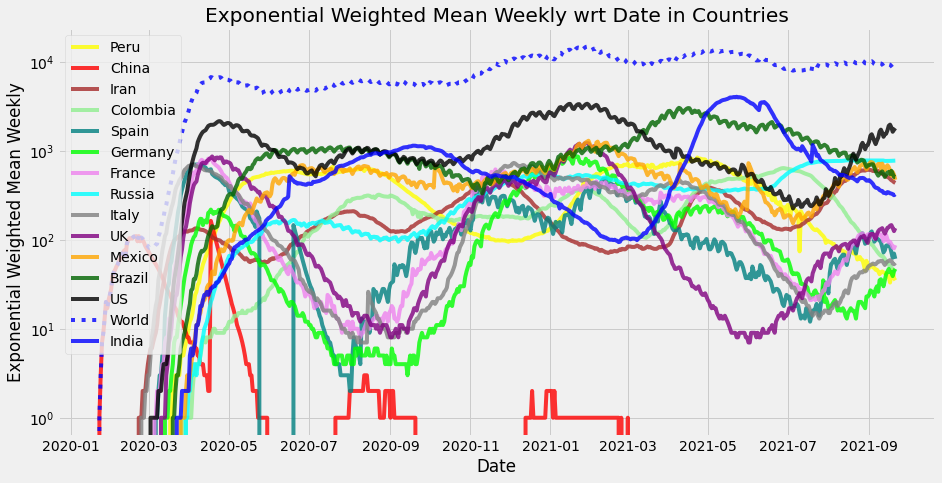

In [18]:
plotter(np.round(AVG), name)

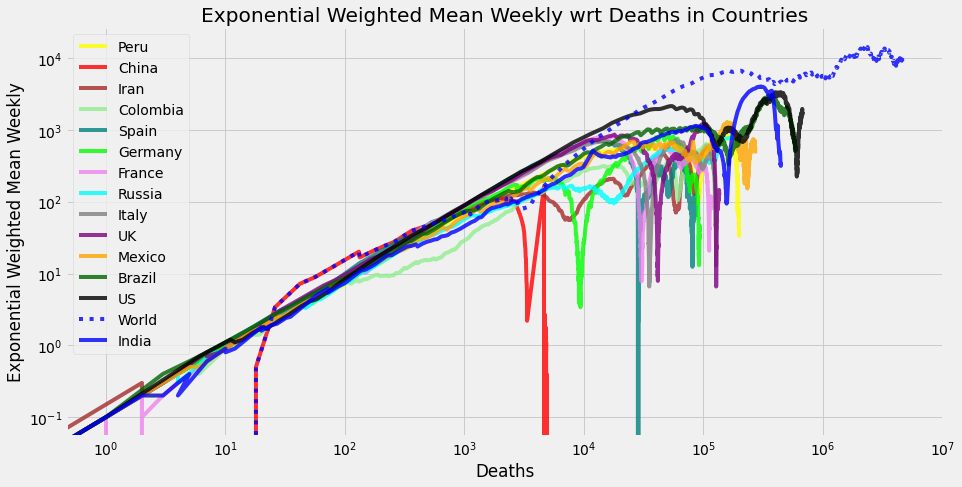

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

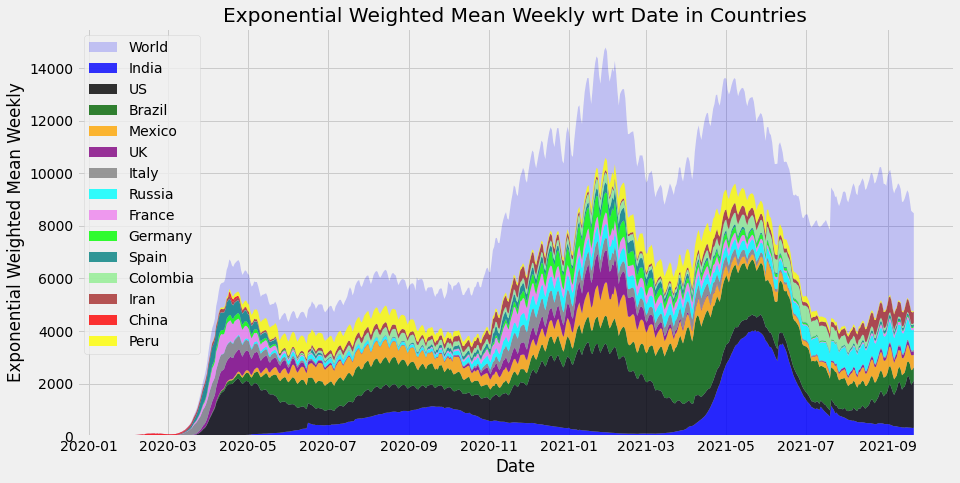

In [20]:
stackplotter(AVG, name)

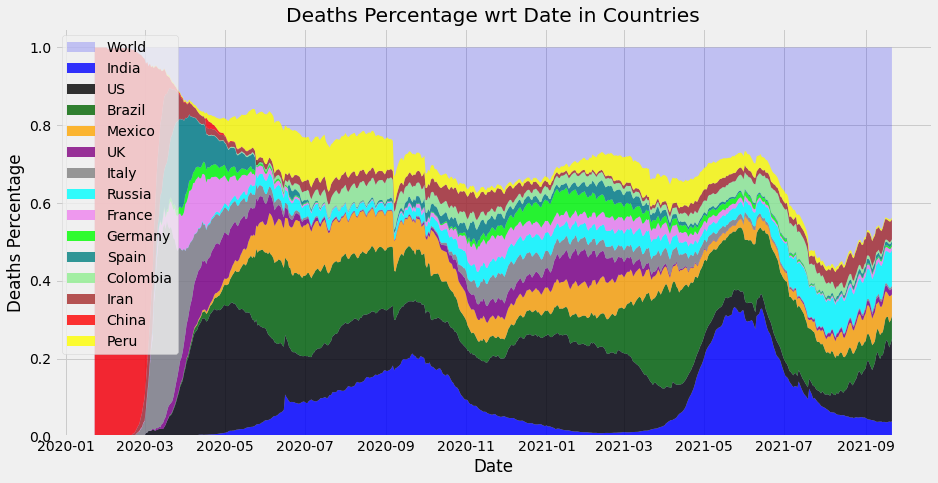

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

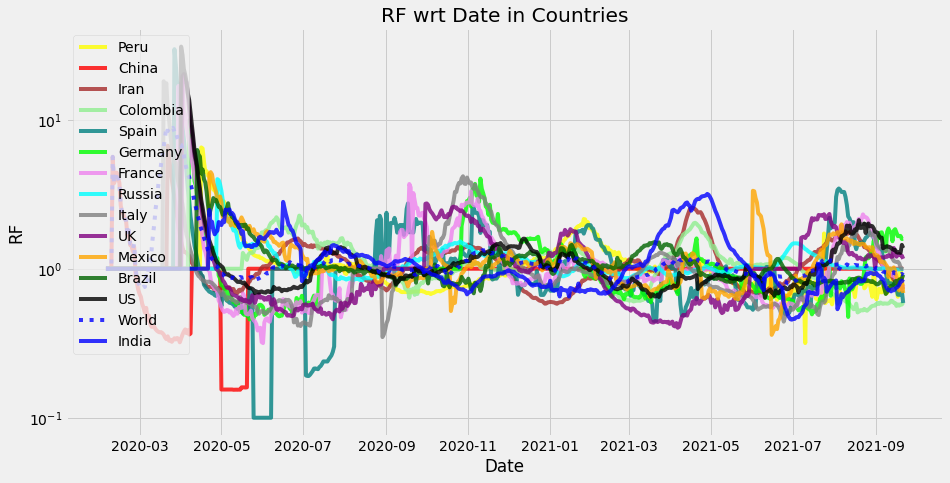

In [23]:
plotter(Reproductivity, 'RF')

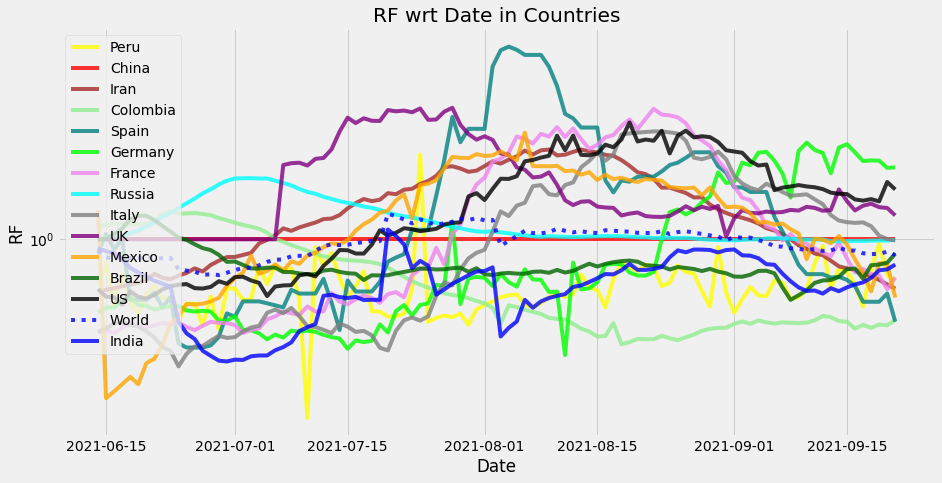

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

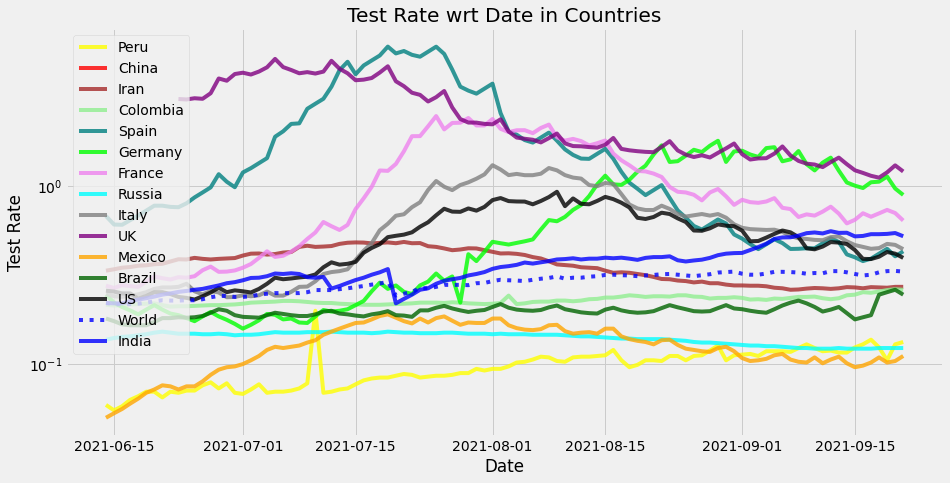

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

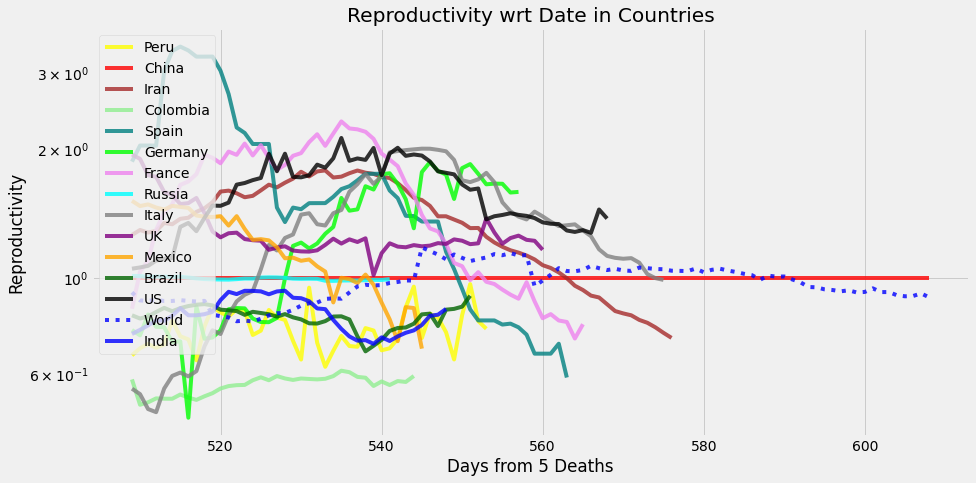

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

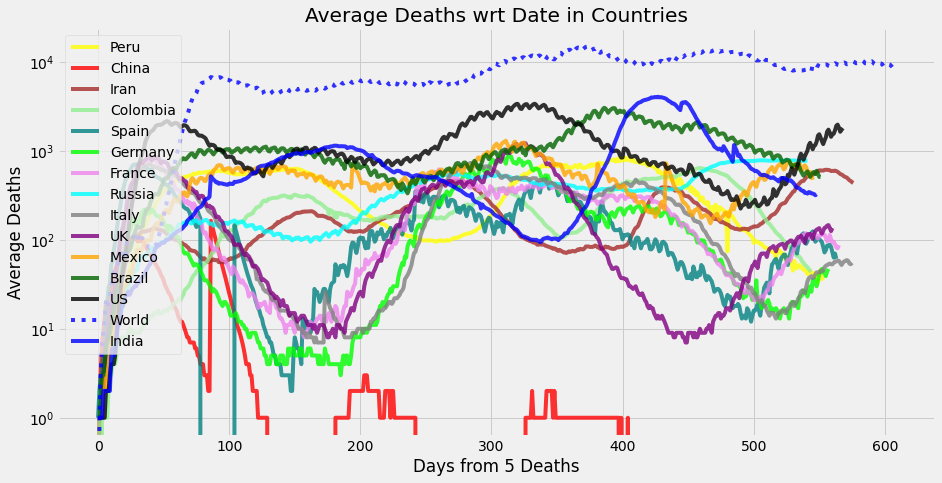

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

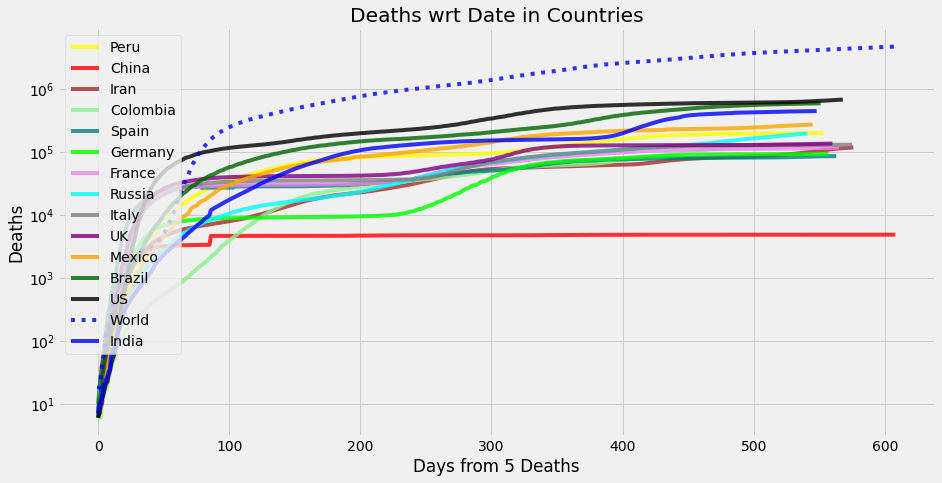

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4708204,8201,8352.00,8480.54,0.9038,229535001,0.330,559558,941.64
US,678407,2331,2031.43,1793.74,1.3779,42410607,0.394,141491,135.68
Brazil,591440,485,520.43,505.09,0.9117,21247094,0.245,24726,118.29
India,445768,383,324.43,324.41,0.8497,33531498,0.521,33824,89.15
Mexico,271765,0,392.71,471.11,0.6871,3573044,0.111,10430,54.35
Peru,199060,24,31.43,35.06,0.7642,2168431,0.133,933,39.81
Russia,196235,797,777.43,774.14,0.9965,7208241,0.123,18984,39.25
Indonesia,140805,171,198.57,296.00,0.4167,4195958,0.134,7946,28.16
UK,135793,204,145.57,134.74,1.1659,7531922,1.202,32396,27.16


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4708204,8201,8352.00,8480.54,0.9038,229535001,0.330,559558,941.64
US,678407,2331,2031.43,1793.74,1.3779,42410607,0.394,141491,135.68
Russia,196235,797,777.43,774.14,0.9965,7208241,0.123,18984,39.25
Brazil,591440,485,520.43,505.09,0.9117,21247094,0.245,24726,118.29
Mexico,271765,0,392.71,471.11,0.6871,3573044,0.111,10430,54.35
Iran,117905,379,391.14,434.92,0.7278,5459796,0.271,23615,23.58
Malaysia,24078,334,355.86,353.98,1.2103,2127934,0.256,18138,4.82
India,445768,383,324.43,324.41,0.8497,33531498,0.521,33824,89.15
Turkey,62065,260,238.86,243.54,0.9558,6904255,0.494,24049,12.41


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4708204


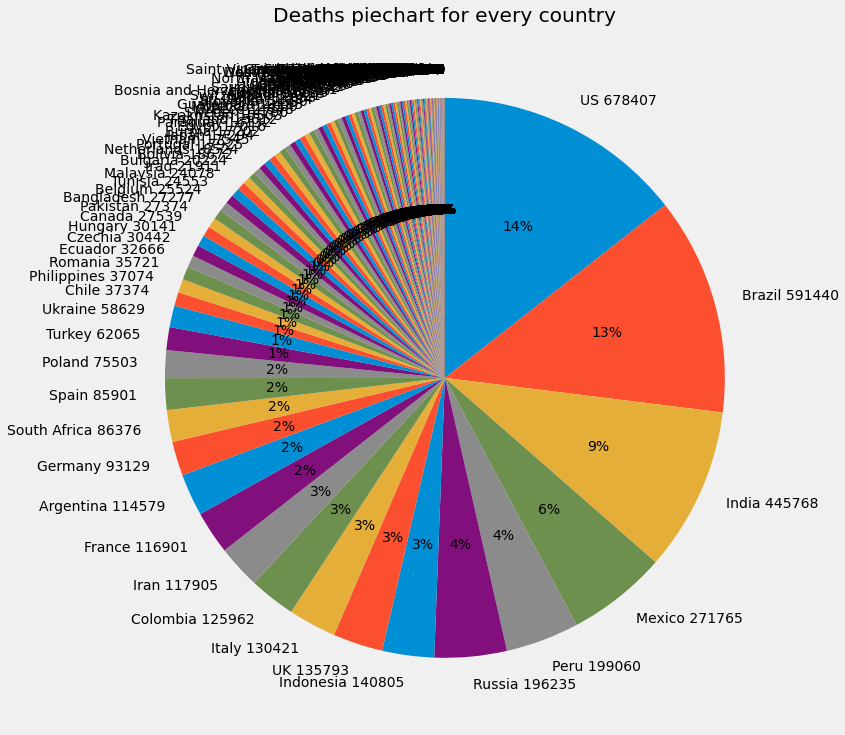

In [35]:
piechart('Deaths')

World total:  8352


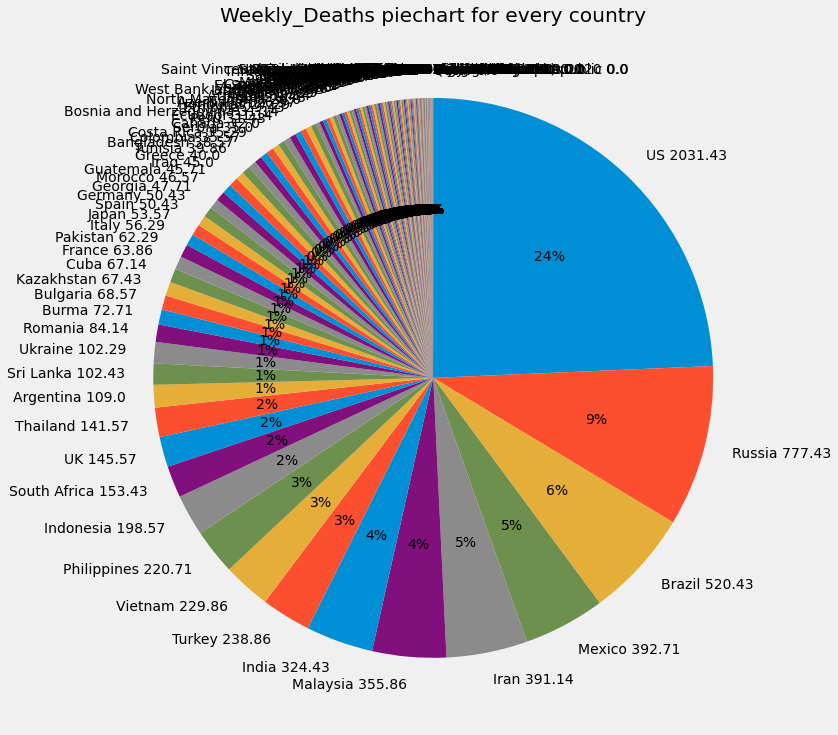

In [36]:
piechart('Weekly_Deaths')

World total:  8201


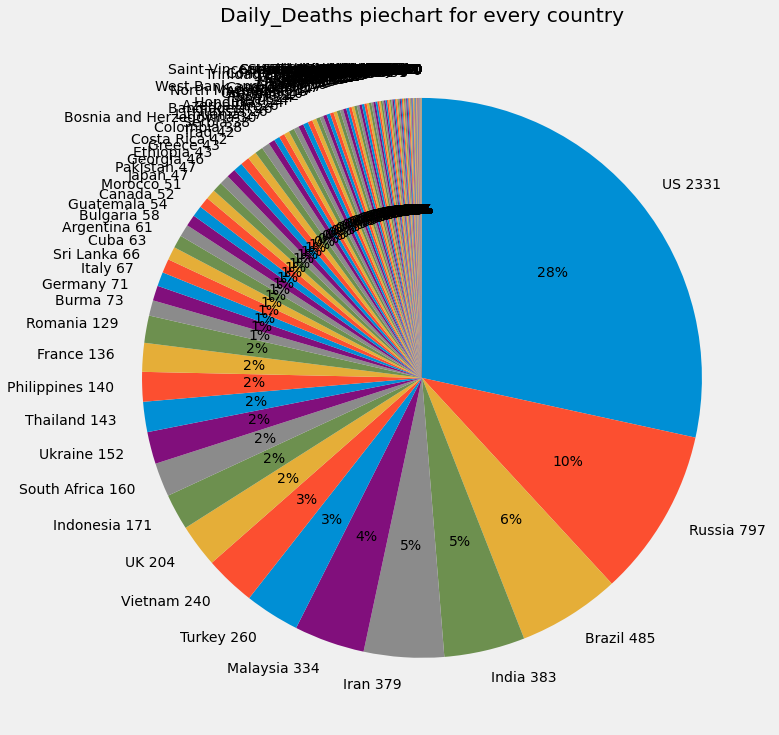

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-09-22


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

941640800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master e6851b7] `date` update
 1 file changed, 2125 insertions(+), 2125 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (66%)


To https://github.com/Arrowheadahp/COVID-19.git
   d801ccf..e6851b7  master -> master
